In [36]:
import pandas as pd
from importlib import reload
import sklearn as sk

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.min_rows', 999)

%config IPCompleter.use_jedi = False

In [37]:
df = pd.read_csv("./df_with_counties_v1.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,district_cd,cohortye,total,gr_droppedout,gr_graduated,gr_iep,gr_ged,gr_stillenrolled,outcome_yrs,srcyear,subgroup,_name_,gr_local_cnt,year,district_from_df1,num_asian,num_black,num_hisp,num_am_ind,num_white,num_female,num_male,num_lep,num_free_lunch,num_reduced_lunch,num_multi,num_swd,num_ecdis,num_ell,district_from_faru,ufb,staid,star,totstat,lrev,fedrev,totrev,state_aid_total_revenues,star_total_revenues,state_revenues_total_revenues,bded,cadm,tsal,pps,cds,boc,tui1,tui2,ois,oiexp,cser,opmt,tchr,heal,oeb,total_fringe_benefits,ound,oth,subtot,trans,dsp,dsi,texp,total_unexpended_surplus_funds_t,revenue_expenditures,var,dcaadm,rev_pupil,exp_pupil,av_twpu,inc_twpu,pwr,apwr,cwr,instructional_salaries,instructional_fringe_benefits,ins_fb,adjusted_expenditures__subtotal,ie1,ie1_total,ie2_instructional_expenditures_i,ie2,ie3_instructional_expenditures_i,ie3_adj_exp,loc_eff_rate,districtid,name,county_name,district_name
0,0,0,10100,2000,618,83.0,407,21.0,57.0,50.0,5.0,200506,1.0,NaN,NaN,2005,10100,269.0,5952.0,918.0,21.0,1884.0,NaN,NaN,300.0,5505.0,970.0,0.0,NaN,NaN,NaN,10100,5680290,54570126,10225351,64795477,98285968,16659701,179741146,0.303604,0.056889,0.360493,490999,2118256,54023846,5251097,4501195,3728010,188593,6610228,16305802,19303934,1199428,11203660,5165294,14257866,14441655,33864815,4053261,564400,163407524,5972182,7669294,5365766,182414766,0.031139,-2673620,-0.014657,10559,17022.553840,17275.761530,244659,93587,0.706290,0.789764,0.748027,83809950,3.117730e+07,0.170914,162986931,109912705.0,0.602543,1.410900e+08,0.773457,1.409014e+08,0.864495,26.51,10100.0,albany city,Albany,albany city
1,1,1,10100,2001,579,100.0,384,40.0,27.0,28.0,5.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city
2,2,2,10100,2001,579,84.0,327,30.0,26.0,112.0,4.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city
3,3,3,10100,2001,579,103.0,397,41.0,29.0,9.0,6.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city
4,4,4,10100,2002,602,143.0,389,22.0,15.0,33.0,5.0,200806,1.0,NaN,NaN,2008,10100,382.0,4894.0,908.0,27.0,1592.0,NaN,NaN,405.0,4660.0,757.0,96.0,NaN,NaN,NaN,10100,11443927,88986207,9683819,98670026,108582740,12186499,219439265,0.405516,0.044130,0.449646,325611,2333872,57538745,632

In [38]:
#oops

In [39]:
display(df.shape)
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(18,60))
df['grad_ratio'] = df.gr_graduated / df.total

# sns.violinplot(df.grad_ratio, df.county_name)

(38868, 91)

<Figure size 1296x4320 with 0 Axes>

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

feature_names = ['rev_pupil', 'exp_pupil', 'num_reduced_lunch', 'num_free_lunch']
df['grad_ratio'] = df.gr_graduated / df.total
X = pd.DataFrame(df, columns=feature_names)
y = pd.DataFrame(df.grad_ratio)

# generate OLS model
model = LinearRegression()
model_fit = model.fit(X, y)

In [41]:
r_sq = model_fit.score(X, y)
display(r_sq)
print('intercept = ', model.intercept_[0])
print('coefs = ', model.coef_)

0.059334970132878806

intercept =  0.8726538721261298
coefs =  [[-4.75299826e-06  4.28994726e-06 -6.18875717e-05 -1.39250823e-05]]


/Users/dave/src/CSE6242/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exp_pupil', ylabel='grad_ratio'>

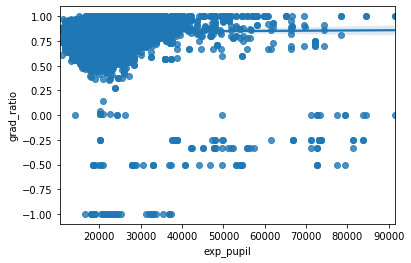

In [42]:
x = df.exp_pupil
sns.regplot(x, y)

/Users/dave/src/CSE6242/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exp_pupil', ylabel='grad_ratio'>

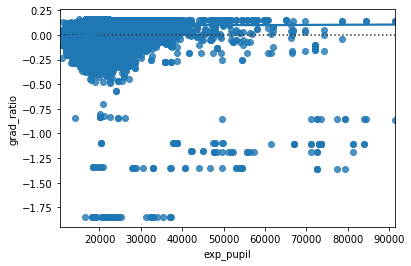

In [43]:
sns.residplot(x, y, lowess=True)

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)



In [45]:
df.shape

(38868, 92)

In [46]:
model_f = 'grad_ratio ~ num_free_lunch + \
                 num_reduced_lunch + \
                 exp_pupil + \
                 rev_pupil'

model = smf.ols(formula=model_f, data=df)
model_fit = model.fit()

In [47]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

# Residuals vs. Fitted

/Users/dave/src/CSE6242/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


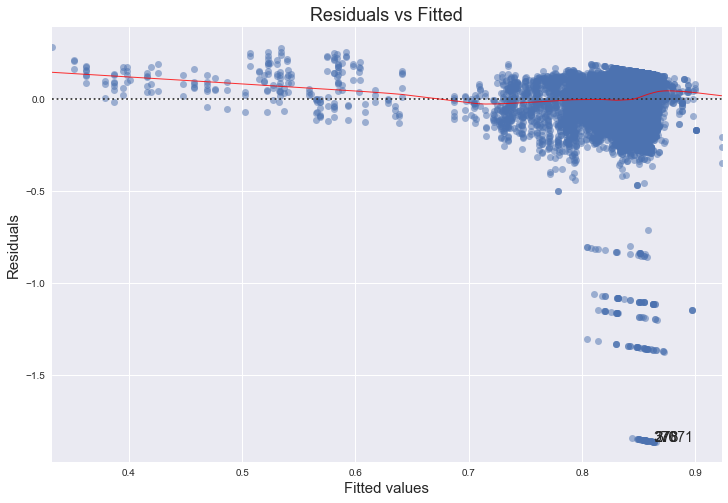

In [48]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'grad_ratio', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot

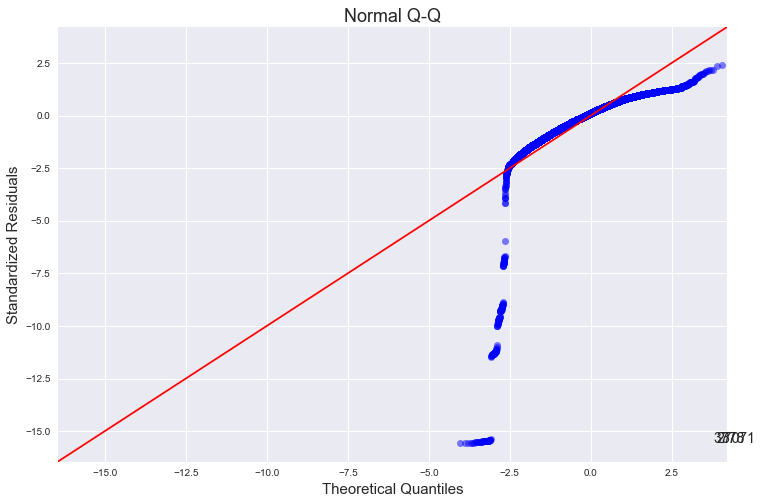

In [49]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# 

# Scale-Location

/Users/dave/src/CSE6242/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


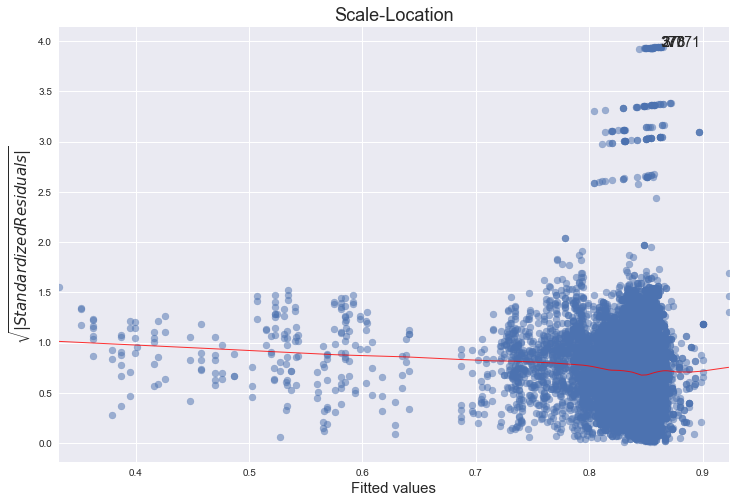

In [50]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));
                                   

# Leverage

/Users/dave/src/CSE6242/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


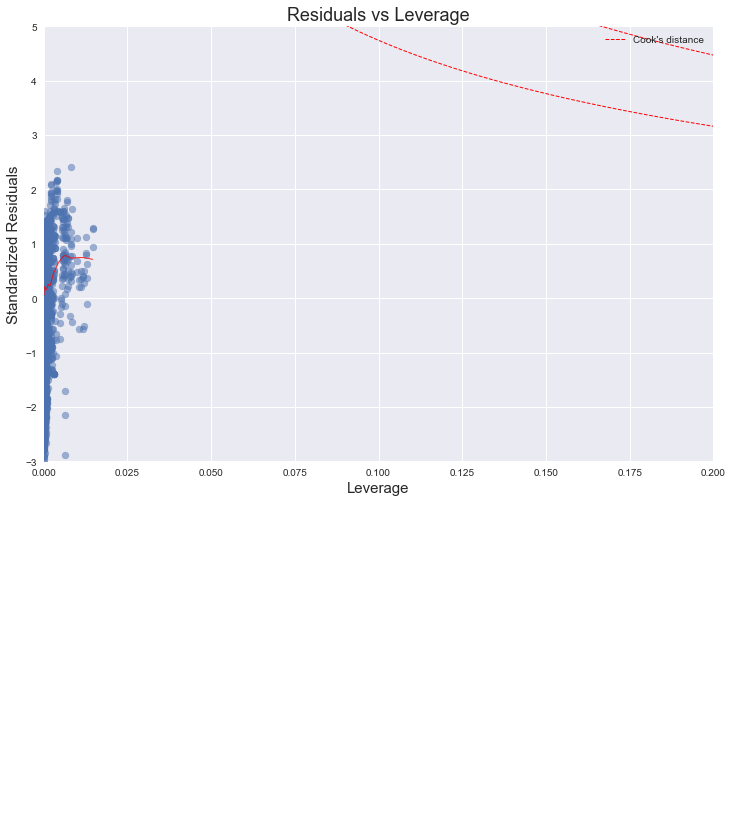

In [51]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [52]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [53]:
from sklearn.multioutput import MultiOutputRegressor

X, y = 

SyntaxError: invalid syntax (<ipython-input-53-6b2cf87db5c6>, line 3)

In [54]:
df.head()

,Unnamed: 0,Unnamed: 0.1,district_cd,cohortye,total,gr_droppedout,gr_graduated,gr_iep,gr_ged,gr_stillenrolled,outcome_yrs,srcyear,subgroup,_name_,gr_local_cnt,year,district_from_df1,num_asian,num_black,num_hisp,num_am_ind,num_white,num_female,num_male,num_lep,num_free_lunch,num_reduced_lunch,num_multi,num_swd,num_ecdis,num_ell,district_from_faru,ufb,staid,star,totstat,lrev,fedrev,totrev,state_aid_total_revenues,star_total_revenues,state_revenues_total_revenues,bded,cadm,tsal,pps,cds,boc,tui1,tui2,ois,oiexp,cser,opmt,tchr,heal,oeb,total_fringe_benefits,ound,oth,subtot,trans,dsp,dsi,texp,total_unexpended_surplus_funds_t,revenue_expenditures,var,dcaadm,rev_pupil,exp_pupil,av_twpu,inc_twpu,pwr,apwr,cwr,instructional_salaries,instructional_fringe_benefits,ins_fb,adjusted_expenditures__subtotal,ie1,ie1_total,ie2_instructional_expenditures_i,ie2,ie3_instructional_expenditures_i,ie3_adj_exp,loc_eff_rate,districtid,name,county_name,district_name,grad_ratio
0,0,0,10100,2000,618,83.0,407,21.0,57.0,50.0,5.0,200506,1.0,NaN,NaN,2005,10100,269.0,5952.0,918.0,21.0,1884.0,NaN,NaN,300.0,5505.0,970.0,0.0,NaN,NaN,NaN,10100,5680290,54570126,10225351,64795477,98285968,16659701,179741146,0.303604,0.056889,0.360493,490999,2118256,54023846,5251097,4501195,3728010,188593,6610228,16305802,19303934,1199428,11203660,5165294,14257866,14441655,33864815,4053261,564400,163407524,5972182,7669294,5365766,182414766,0.031139,-2673620,-0.014657,10559,17022.553840,17275.761530,244659,93587,0.706290,0.789764,0.748027,83809950,3.117730e+07,0.170914,162986931,109912705.0,0.602543,1.410900e+08,0.773457,1.409014e+08,0.864495,26.51,10100.0,albany city,Albany,albany city,0.658576
1,1,1,10100,2001,579,100.0,384,40.0,27.0,28.0,5.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.663212
2,2,2,10100,2001,579,84.0,327,30.0,26.0,112.0,4.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.564767
3,3,3,10100,2001,579,103.0,397,41.0,29.0,9.0,6.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.685665
4,4,4,10100,2002,602,143.0,389,22.0,15.0,33.0,5.0,200806,1.0,NaN,NaN,2008,10100,382.0,4894.0,908.0,27.0,1592.0,NaN,NaN,405.0,4660.0,757.0,96.0,NaN,NaN,NaN,10100,11443927,88986207,9683819,98670026,108582740,12186499,219439265,0.40551

In [58]:
# drop all NA columns
df_col_clean = df.drop(columns=['_name_', 'gr_local_cnt', 'num_female', 'num_male', 'num_swd', 'num_ecdis', 'num_ell', 'num_am_ind'])
df_col_clean.isna().sum()

Unnamed: 0                             0
Unnamed: 0.1                           0
district_cd                            0
cohortye                               0
total                                  0
gr_droppedout                          0
gr_graduated                           0
gr_iep                                 0
gr_ged                                 0
gr_stillenrolled                       0
outcome_yrs                            0
srcyear                                0
subgroup                               0
year                                   0
district_from_df1                      0
num_asian                            169
num_black                            108
num_hisp                              30
num_white                              3
num_lep                                0
num_free_lunch                         0
num_reduced_lunch                      0
num_multi                            171
district_from_faru                     0
ufb             

In [59]:
df_row_clean = df_col_clean.dropna(axis = 0, subset = ['county_name'])
df_row_clean.isna().sum()

Unnamed: 0                            0
Unnamed: 0.1                          0
district_cd                           0
cohortye                              0
total                                 0
gr_droppedout                         0
gr_graduated                          0
gr_iep                                0
gr_ged                                0
gr_stillenrolled                      0
outcome_yrs                           0
srcyear                               0
subgroup                              0
year                                  0
district_from_df1                     0
num_asian                           157
num_black                            99
num_hisp                             24
num_white                             0
num_lep                               0
num_free_lunch                        0
num_reduced_lunch                     0
num_multi                           156
district_from_faru                    0
ufb                                   0


# Imputing Missing Ethnic Counts

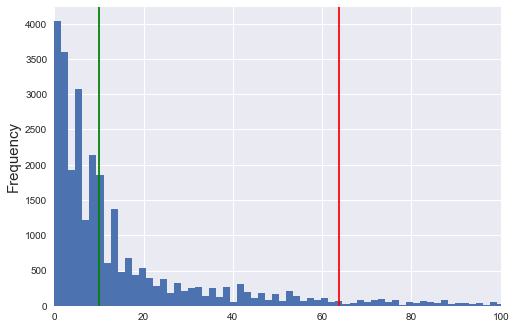

In [73]:
import matplotlib.pyplot as plt

df_row_clean.num_asian.plot(kind='hist', 
                            bins=2000, 
                            xlim=(0, 100))
plt.axvline(df_row_clean.num_asian.mean(), color='red')
plt.axvline(df_row_clean.num_asian.median(), color='green')

In [80]:
df_final = df_row_clean[['num_asian', 
                         'num_black', 
                         'num_hisp', 
                         'num_multi']].fillna(df_row_clean[['num_asian', 
                                                            'num_black', 
                                                            'num_hisp', 
                                                            'num_multi']].median())


In [79]:
df_row_clean[['num_asian', 'num_black', 'num_hisp', 'num_multi']].median()

num_asian    10.0
num_black    16.0
num_hisp     23.0
num_multi     7.0
dtype: float64

In [81]:
df_final.to_csv('./df_clean_unreg.csv')

# Regularizing Columns

In [82]:
df_row_clean.head()
continuous_columns = 

,Unnamed: 0,Unnamed: 0.1,district_cd,cohortye,total,gr_droppedout,gr_graduated,gr_iep,gr_ged,gr_stillenrolled,outcome_yrs,srcyear,subgroup,year,district_from_df1,num_asian,num_black,num_hisp,num_white,num_lep,num_free_lunch,num_reduced_lunch,num_multi,district_from_faru,ufb,staid,star,totstat,lrev,fedrev,totrev,state_aid_total_revenues,star_total_revenues,state_revenues_total_revenues,bded,cadm,tsal,pps,cds,boc,tui1,tui2,ois,oiexp,cser,opmt,tchr,heal,oeb,total_fringe_benefits,ound,oth,subtot,trans,dsp,dsi,texp,total_unexpended_surplus_funds_t,revenue_expenditures,var,dcaadm,rev_pupil,exp_pupil,av_twpu,inc_twpu,pwr,apwr,cwr,instructional_salaries,instructional_fringe_benefits,ins_fb,adjusted_expenditures__subtotal,ie1,ie1_total,ie2_instructional_expenditures_i,ie2,ie3_instructional_expenditures_i,ie3_adj_exp,loc_eff_rate,districtid,name,county_name,district_name,grad_ratio
0,0,0,10100,2000,618,83.0,407,21.0,57.0,50.0,5.0,200506,1.0,2005,10100,269.0,5952.0,918.0,1884.0,300.0,5505.0,970.0,0.0,10100,5680290,54570126,10225351,64795477,98285968,16659701,179741146,0.303604,0.056889,0.360493,490999,2118256,54023846,5251097,4501195,3728010,188593,6610228,16305802,19303934,1199428,11203660,5165294,14257866,14441655,33864815,4053261,564400,163407524,5972182,7669294,5365766,182414766,0.031139,-2673620,-0.014657,10559,17022.553840,17275.761530,244659,93587,0.706290,0.789764,0.748027,83809950,3.117730e+07,0.170914,162986931,109912705.0,0.602543,1.410900e+08,0.773457,1.409014e+08,0.864495,26.51,10100.0,albany city,Albany,albany city,0.658576
1,1,1,10100,2001,579,100.0,384,40.0,27.0,28.0,5.0,200706,1.0,2007,10100,360.0,5281.0,940.0,1654.0,382.0,3992.0,789.0,77.0,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.663212
2,2,2,10100,2001,579,84.0,327,30.0,26.0,112.0,4.0,200706,1.0,2007,10100,360.0,5281.0,940.0,1654.0,382.0,3992.0,789.0,77.0,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.564767
3,3,3,10100,2001,579,103.0,397,41.0,29.0,9.0,6.0,200706,1.0,2007,10100,360.0,5281.0,940.0,1654.0,382.0,3992.0,789.0,77.0,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,albany city,Albany,albany city,0.685665
4,4,4,10100,2002,602,143.0,389,22.0,15.0,33.0,5.0,200806,1.0,2008,10100,382.0,4894.0,908.0,1592.0,405.0,4660.0,757.0,96.0,10100,11443927,88986207,9683819,98670026,108582740,12186499,219439265,0.405516,0.044130,0.449646,325611,2333872,57538745,6323772,4632120,5340457,734445,7801336,18044340,30170560,428795,11628871,5143395,17442327,13876660,36462382,3527941,760170,186053417,6320002,8410609,6874804,207658832,0.055109,11780433,0.056730,1070

# Modeling with MultiVar Inputs and MultiVar Outputs

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X, y = make_multilabel_classification(n_classes = 3, random_state = 42)

In [ ]:
pd.DataFrame(X).head()

In [ ]:
X, y = make_multilabel_classification(n_classes=3, random_state=0)
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)
clf.predict(X[-2:])